In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
import os
from dotenv import load_dotenv
from langchain_groq import ChatGroq
load_dotenv()

api_key = os.getenv('GROQ_API_KEY')
llm = ChatGroq(model="llama-3.1-8b-instant", api_key=api_key)

In [2]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str

In [5]:
def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state['title']

    # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = llm.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [6]:
def create_blog(state: BlogState) -> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = llm.invoke(prompt).content

    state['content'] = content

    return state

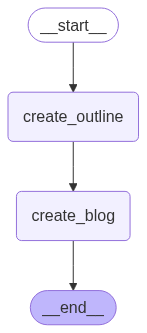

In [11]:
graph = StateGraph(BlogState)

# nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)

# edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

workflow = graph.compile()
workflow

In [8]:
intial_state = {'title': 'Rise of AI in India'}

final_state = workflow.invoke(intial_state)

print(final_state)

{'title': 'Rise of AI in India', 'outline': "**Title:** The Rise of AI in India: Opportunities, Challenges, and Future Prospects\n\n**I. Introduction**\n\n- Brief overview of AI and its growing importance worldwide\n- Introduction to the Indian AI ecosystem and its current state\n- Thesis statement: The rise of AI in India presents significant opportunities for economic growth, innovation, and job creation, but also poses challenges that need to be addressed.\n\n**II. Current State of AI in India**\n\n- Overview of the Indian AI market size and growth rate\n- Key AI-related initiatives and projects in India (e.g., NITI Aayog's AI for All program)\n- Major players in the Indian AI industry, including startups and established companies\n\n**III. Opportunities of AI in India**\n\n- Economic growth and job creation: How AI can drive economic growth, create new job opportunities, and bridge the skills gap\n- Healthcare and medical research: AI applications in medical diagnosis, personalized

In [9]:
print(final_state['outline'])

**Title:** The Rise of AI in India: Opportunities, Challenges, and Future Prospects

**I. Introduction**

- Brief overview of AI and its growing importance worldwide
- Introduction to the Indian AI ecosystem and its current state
- Thesis statement: The rise of AI in India presents significant opportunities for economic growth, innovation, and job creation, but also poses challenges that need to be addressed.

**II. Current State of AI in India**

- Overview of the Indian AI market size and growth rate
- Key AI-related initiatives and projects in India (e.g., NITI Aayog's AI for All program)
- Major players in the Indian AI industry, including startups and established companies

**III. Opportunities of AI in India**

- Economic growth and job creation: How AI can drive economic growth, create new job opportunities, and bridge the skills gap
- Healthcare and medical research: AI applications in medical diagnosis, personalized medicine, and healthcare services
- Education and skills deve

In [10]:
print(final_state['content'])

**The Rise of AI in India: Opportunities, Challenges, and Future Prospects**

Artificial intelligence (AI) has been making waves around the world, transforming industries, and revolutionizing the way we live and work. India, with its vast pool of talent, growing economy, and innovative spirit, is poised to be a major player in the global AI landscape. In this blog, we will delve into the current state of AI in India, explore the opportunities and challenges it presents, and examine the future prospects of this rapidly evolving field.

**I. Introduction**

AI has become an indispensable tool in today's digital age, with applications in healthcare, finance, education, and beyond. From chatbots to self-driving cars, AI-powered technologies are transforming the way we interact with the world. According to a report by MarketsandMarkets, the global AI market is expected to reach $190 billion by 2025, growing at a compound annual growth rate (CAGR) of 38.4%. India, with its large and young po